In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellem.dvc.experiment import load_experiments

filenames = ["hotpotqa-manual-prompting.json"]

experiments = [exp for filename in filenames for exp in load_experiments(filename)]
print(f"{len(experiments)} experiments")
experiments[0]

57 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/hotpotqa-distractor',
   'name': 'default',
   'split': 'validation'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'system_prompt': 'no-role.txt',
   'user_prompt_template': 'cq.txt',
   'few_shot_examples': 'empty.json'},
  'run': 1},
 'metrics': {'exact_match': 0.6178257933828494,
  'f1': 0.7896479015986282,
  'fuzzy_match': 0.6960162052667117,
  '2hops': {'exact_match': 0.6178257933828494,
   'f1': 0.7896479015986282,
   'fuzzy_match': 0.6960162052667117}}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id", "name"])
df = df[df["params.dataset.path"] == "bdsaglam/hotpotqa-distractor"].copy()

param_cols = [
    "params.dataset.path",
    "params.dataset.name",
    "params.dataset.split",
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.run",
]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.dropna(subset=param_cols + metric_cols, inplace=True, how="any")
df.drop_duplicates(subset=param_cols, inplace=True)

In [4]:
def parse_qa_technique(system_prompt_filename):
    if "cte" in system_prompt_filename:
        return "CTE"
    if "cot" in system_prompt_filename:
        return "COT"
    return "Standard"

df["params.qa.technique"] = df["params.qa.system_prompt"].map(parse_qa_technique)

In [5]:
import re

def parse_n_shot(x):
    if 'empty' in x:
        return 0
    # match the digit in the string
    x = re.search(r'\d+', x).group()
    return int(x)

assert parse_n_shot('empty.json') == 0
assert parse_n_shot('cot-2-shot.json') == 2

In [6]:
df['params.qa.n_shot'] = df['params.qa.few_shot_examples'].map(parse_n_shot)

In [7]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df

,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.run,metrics.exact_match,...,metrics.2hops.fuzzy_match,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.evaluation.dataset.path,params.evaluation.dataset.name,params.evaluation.dataset.split,params.qa.technique,params.qa.n_shot
0,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,1,0.593248,...,0.685348,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,0
1,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,2,0.595273,...,0.687238,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,0
2,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,3,0.592978,...,0.685348,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,0
3,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,1,0.633626,...,0.683457,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
4,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,2,0.633221,...,0.682512,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
5,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,3,0.631195,...,0.683457,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
6,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,excellent-qa-cot.txt,cq.txt,cot-2-shot.json,1,0.614315,...,0.656989,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
7,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,excellent-qa-cot.txt,cq.txt,cot-2-shot.json,2,0.614045,...,0.656043,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
8,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,excellent-qa-cot.txt,cq.txt,cot-2-shot.json,3,0.614315,...,0.657394,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,COT,2
9,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cte.txt,cq.txt,empty.json,1,0.647670,...,0.700743,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,CTE,0


In [8]:
df['params.qa.system_prompt'].unique().tolist()

['cot.txt',
 'excellent-qa-cot.txt',
 'cte.txt',
 'excellent-qa-cte.txt',
 'excellent-qa-few.txt',
 'excellent-qa-fewest.txt',
 'minimal-output-format-answer-cue-least.txt',
 'minimal-output-format-answer-cue.txt',
 'minimal-output-format-answer-few-no-prio.txt',
 'minimal-output-format.txt',
 'minimal.txt',
 'no-role.txt']

In [9]:
def parse_system_prompt(system_prompt_filename):
    return system_prompt_filename.replace(".txt", "")

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(parse_system_prompt)

In [10]:
run_counts = (
    df.groupby(["params.qa.system_prompt", "params.qa.user_prompt_template", "params.qa.few_shot_examples"])[
        metric_cols[:1]
    ]
    .count()
    .reset_index()
)
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,metrics.exact_match
18,minimal-output-format-answer-few-no-prio,cq.txt,empty.json,2
19,no-role,cq.txt,empty.json,1


In [11]:
# Average metrics over repeated runs (params.run)
df_avg = (
    df.groupby(target_param_cols)[metric_cols]
    .mean()
    .reset_index()
)
df_avg[[*target_param_cols, *metric_cols]].sort_values('metrics.2hops.f1', ascending=False)

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
5,CTE,excellent-qa-cte,cq.txt,2,0.667252,0.813845,0.714742,0.667252,0.813845,0.714742
4,CTE,cte,cq.txt,2,0.660140,0.813166,0.712402,0.660140,0.813166,0.712402
7,Standard,excellent-qa-few,cq.txt,2,0.658024,0.808459,0.707315,0.658024,0.808459,0.707315
9,Standard,excellent-qa-fewest,cq.txt,2,0.663831,0.807695,0.706550,0.663831,0.807695,0.706550
3,CTE,cte,cq.txt,0,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743
8,Standard,excellent-qa-fewest,cq.txt,0,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
17,Standard,minimal-output-format-answer-cue-least,cq.txt,0,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
16,Standard,minimal-output-format-answer-cue-least,cq-sep.txt,0,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,Standard,minimal-output-format,cq-sep.txt,0,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,Standard,minimal-output-format,cq.txt,0,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200


In [12]:
df_target = df_avg.copy()
df_target.sort_values('metrics.f1', inplace=True, ascending=False)
df_target

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
5,CTE,excellent-qa-cte,cq.txt,2,0.667252,0.813845,0.714742,0.667252,0.813845,0.714742
4,CTE,cte,cq.txt,2,0.660140,0.813166,0.712402,0.660140,0.813166,0.712402
7,Standard,excellent-qa-few,cq.txt,2,0.658024,0.808459,0.707315,0.658024,0.808459,0.707315
9,Standard,excellent-qa-fewest,cq.txt,2,0.663831,0.807695,0.706550,0.663831,0.807695,0.706550
3,CTE,cte,cq.txt,0,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743
8,Standard,excellent-qa-fewest,cq.txt,0,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
17,Standard,minimal-output-format-answer-cue-least,cq.txt,0,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
16,Standard,minimal-output-format-answer-cue-least,cq-sep.txt,0,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,Standard,minimal-output-format,cq-sep.txt,0,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,Standard,minimal-output-format,cq.txt,0,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200


In [13]:
def plot_metric(dataf, metric, *, ax, title, bar_width, ylabel=None):
    prompts = [
        f"{method}/{sp}/{up}/{fs}"
        for method, sp, up, fs in zip(
            dataf["params.qa.technique"].values,
            dataf["params.qa.system_prompt"].values,
            dataf["params.qa.user_prompt_template"].values,
            dataf["params.qa.n_shot"].values,
        )
    ]
    x = np.arange(len(prompts))
    metrics = {
        "all": dataf[f"metrics.{metric}"].values,
    }

    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=90)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)

def plot_dataframe(dataf, bar_width=0.3):
    # Creating subplots for Exact Match and F1, separating them for clarity
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18), sharey=True)

    dataf = dataf.sort_values("metrics.f1")

    # Plotting Exact Match
    plot_metric(dataf, 'exact_match', ax=ax1, title="EM", bar_width=bar_width, ylabel="Score")

    # Plotting F1
    plot_metric(dataf, 'f1', ax=ax2, title="F1", bar_width=bar_width, ylabel="Score")

    # Creating a shared legend outside the plots
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)
    plt.tight_layout()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1
5,CTE,excellent-qa-cte,cq.txt,2,0.667252,0.813845
4,CTE,cte,cq.txt,2,0.660140,0.813166
7,Standard,excellent-qa-few,cq.txt,2,0.658024,0.808459
9,Standard,excellent-qa-fewest,cq.txt,2,0.663831,0.807695
3,CTE,cte,cq.txt,0,0.647490,0.803340
8,Standard,excellent-qa-fewest,cq.txt,0,0.654963,0.801151
17,Standard,minimal-output-format-answer-cue-least,cq.txt,0,0.653612,0.800218
16,Standard,minimal-output-format-answer-cue-least,cq-sep.txt,0,0.653792,0.799095
12,Standard,minimal-output-format,cq-sep.txt,0,0.637767,0.796197
13,Standard,minimal-output-format,cq.txt,0,0.635111,0.794818


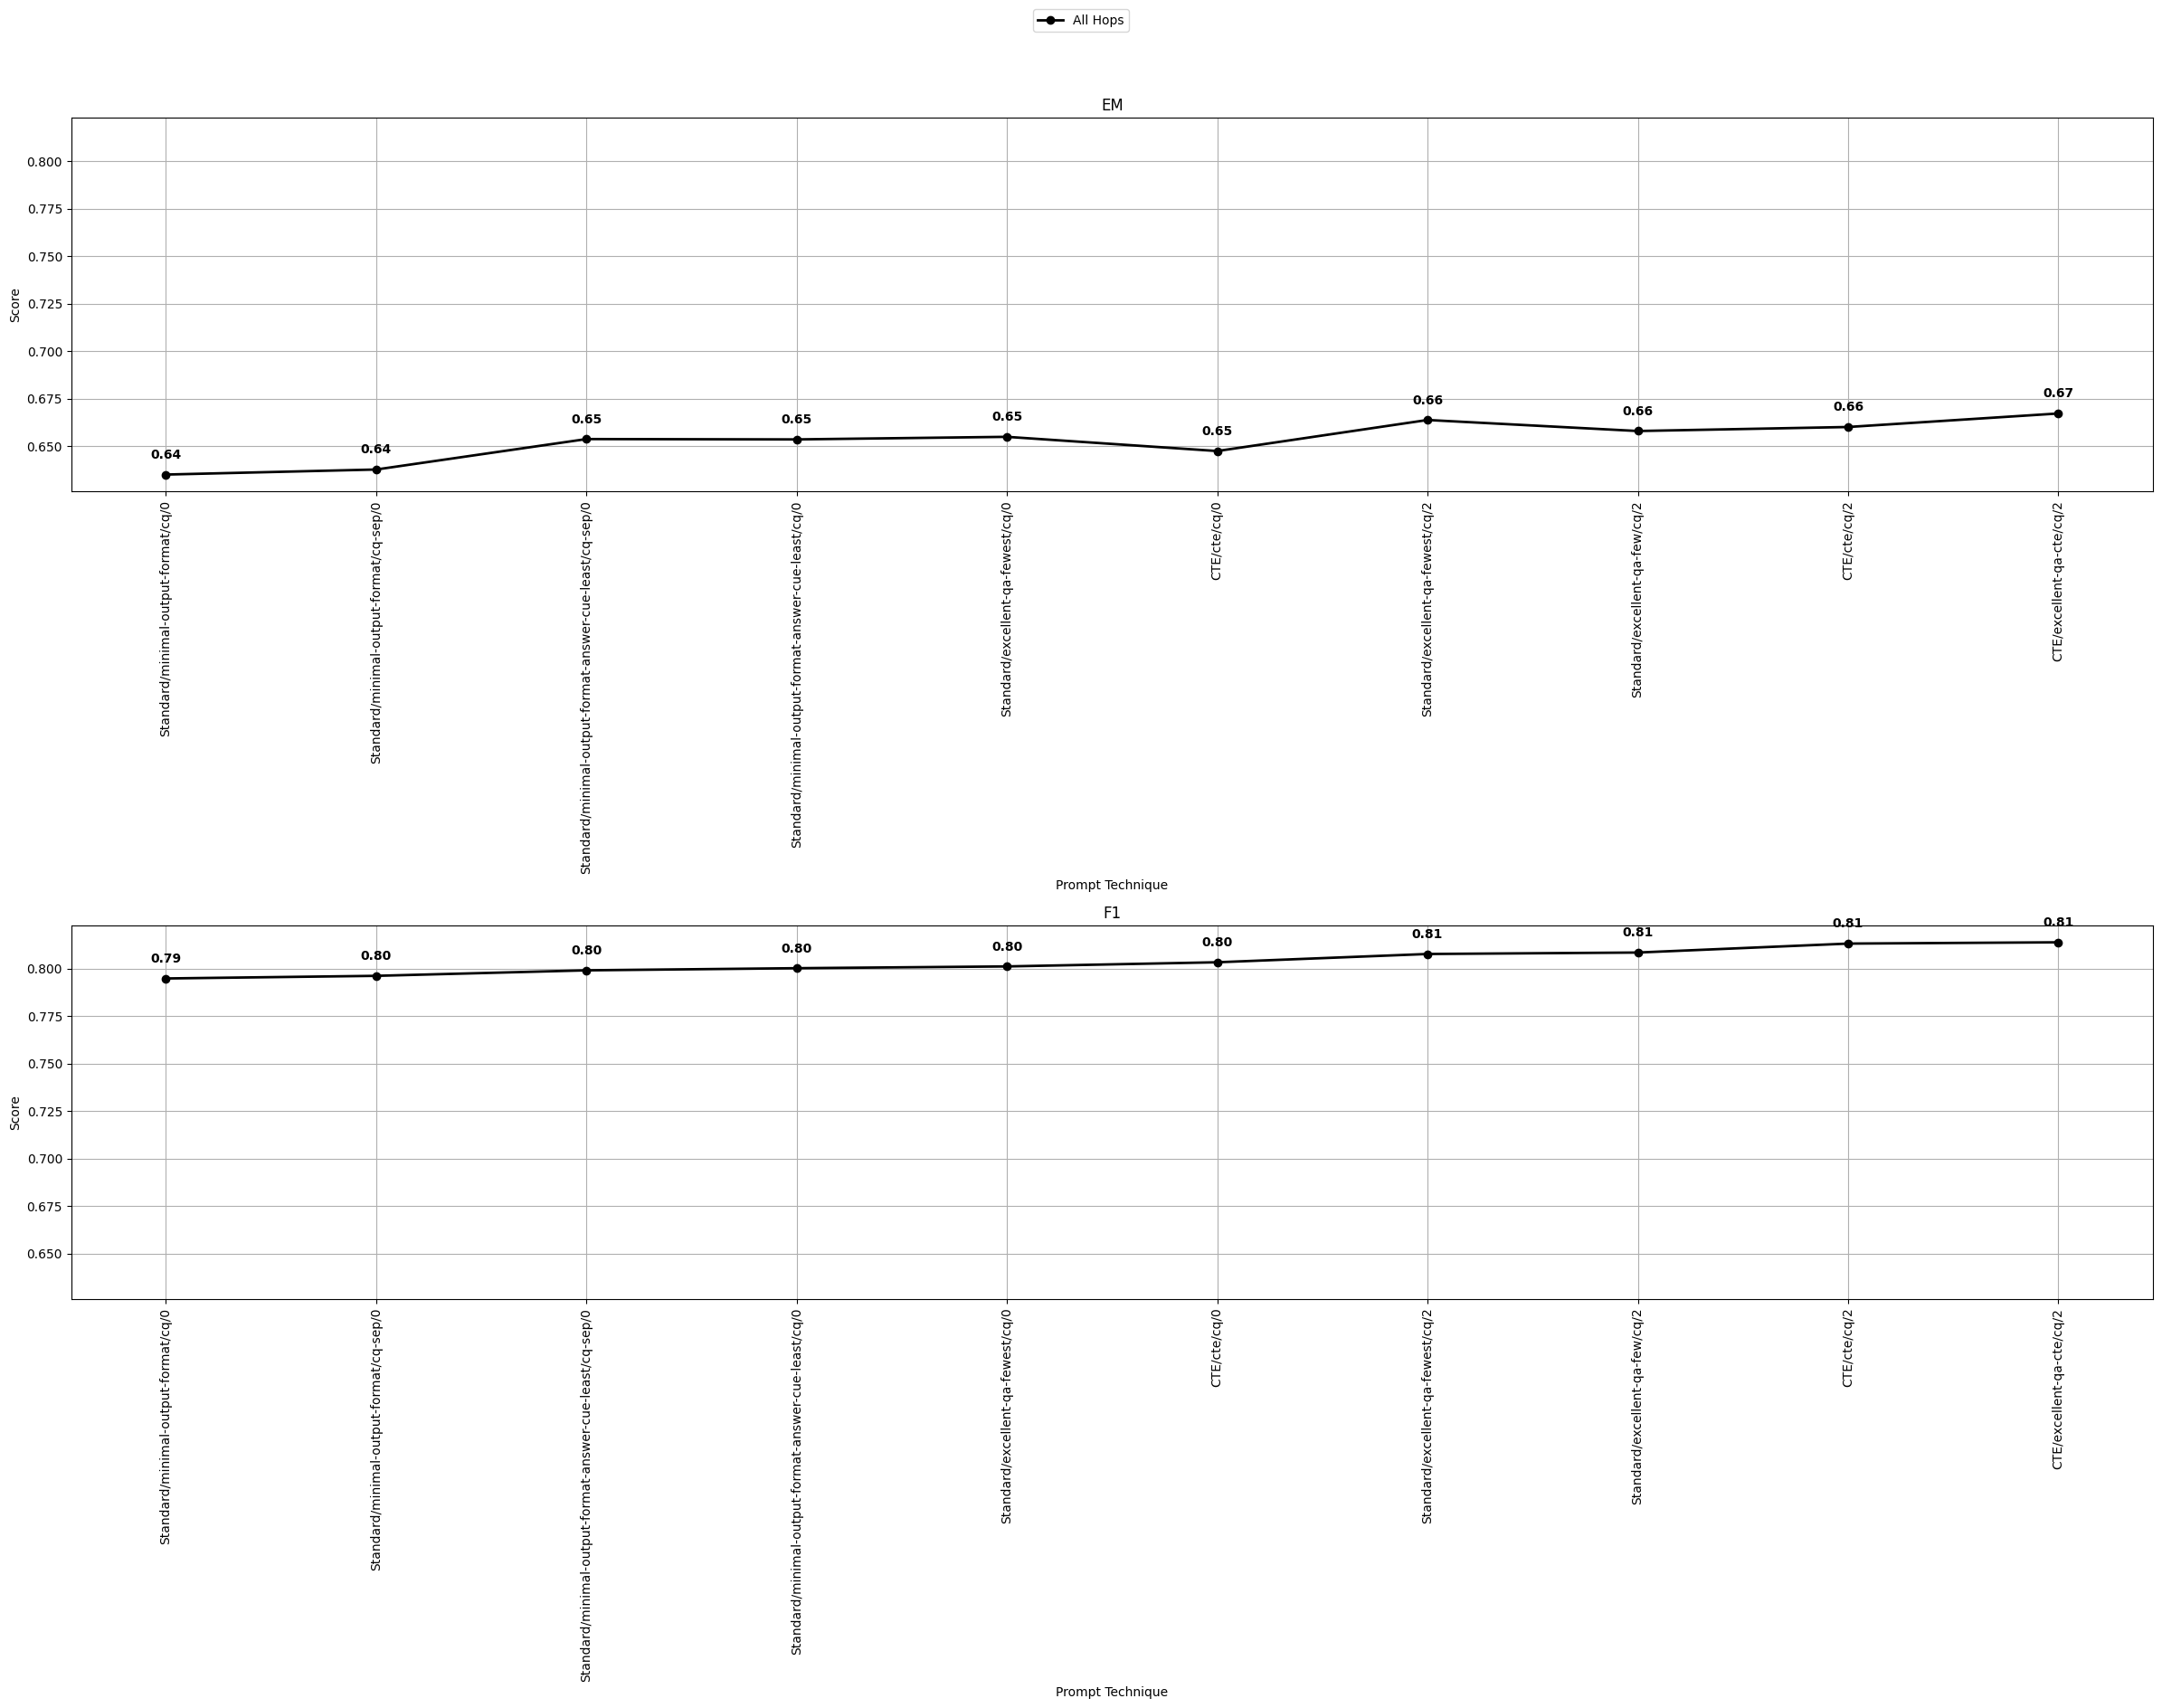

In [14]:
_df = df_target.sort_values('metrics.f1').iloc[-10:]
plot_dataframe(_df)
_df.loc[::-1, target_param_cols + metric_cols[:2]]

In [16]:
mask = df_target.groupby("params.qa.technique")["metrics.f1"].idxmax()
df_target.loc[mask].sort_values("metrics.f1", ascending=False)

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
5,CTE,excellent-qa-cte,cq.txt,2,0.667252,0.813845,0.714742,0.667252,0.813845,0.714742
7,Standard,excellent-qa-few,cq.txt,2,0.658024,0.808459,0.707315,0.658024,0.808459,0.707315
1,COT,cot,cq.txt,2,0.632681,0.783430,0.683142,0.632681,0.783430,0.683142


,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
3,CTE,cte,cq.txt,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743
8,Standard,excellent-qa-fewest,cq.txt,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
17,Standard,minimal-output-format-answer-cue-least,cq.txt,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
16,Standard,minimal-output-format-answer-cue-least,cq-sep.txt,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,Standard,minimal-output-format,cq-sep.txt,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,Standard,minimal-output-format,cq.txt,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200
6,Standard,excellent-qa-few,cq.txt,0.625298,0.793988,0.699437,0.625298,0.793988,0.699437
14,Standard,minimal-output-format-answer-cue,cq-sep.txt,0.620527,0.793233,0.699392,0.620527,0.793233,0.699392
19,Standard,no-role,cq.txt,0.617826,0.789648,0.696016,0.617826,0.789648,0.696016
15,Standard,minimal-output-format-answer-cue,cq.txt,0.610849,0.789404,0.696601,0.610849,0.789404,0.696601


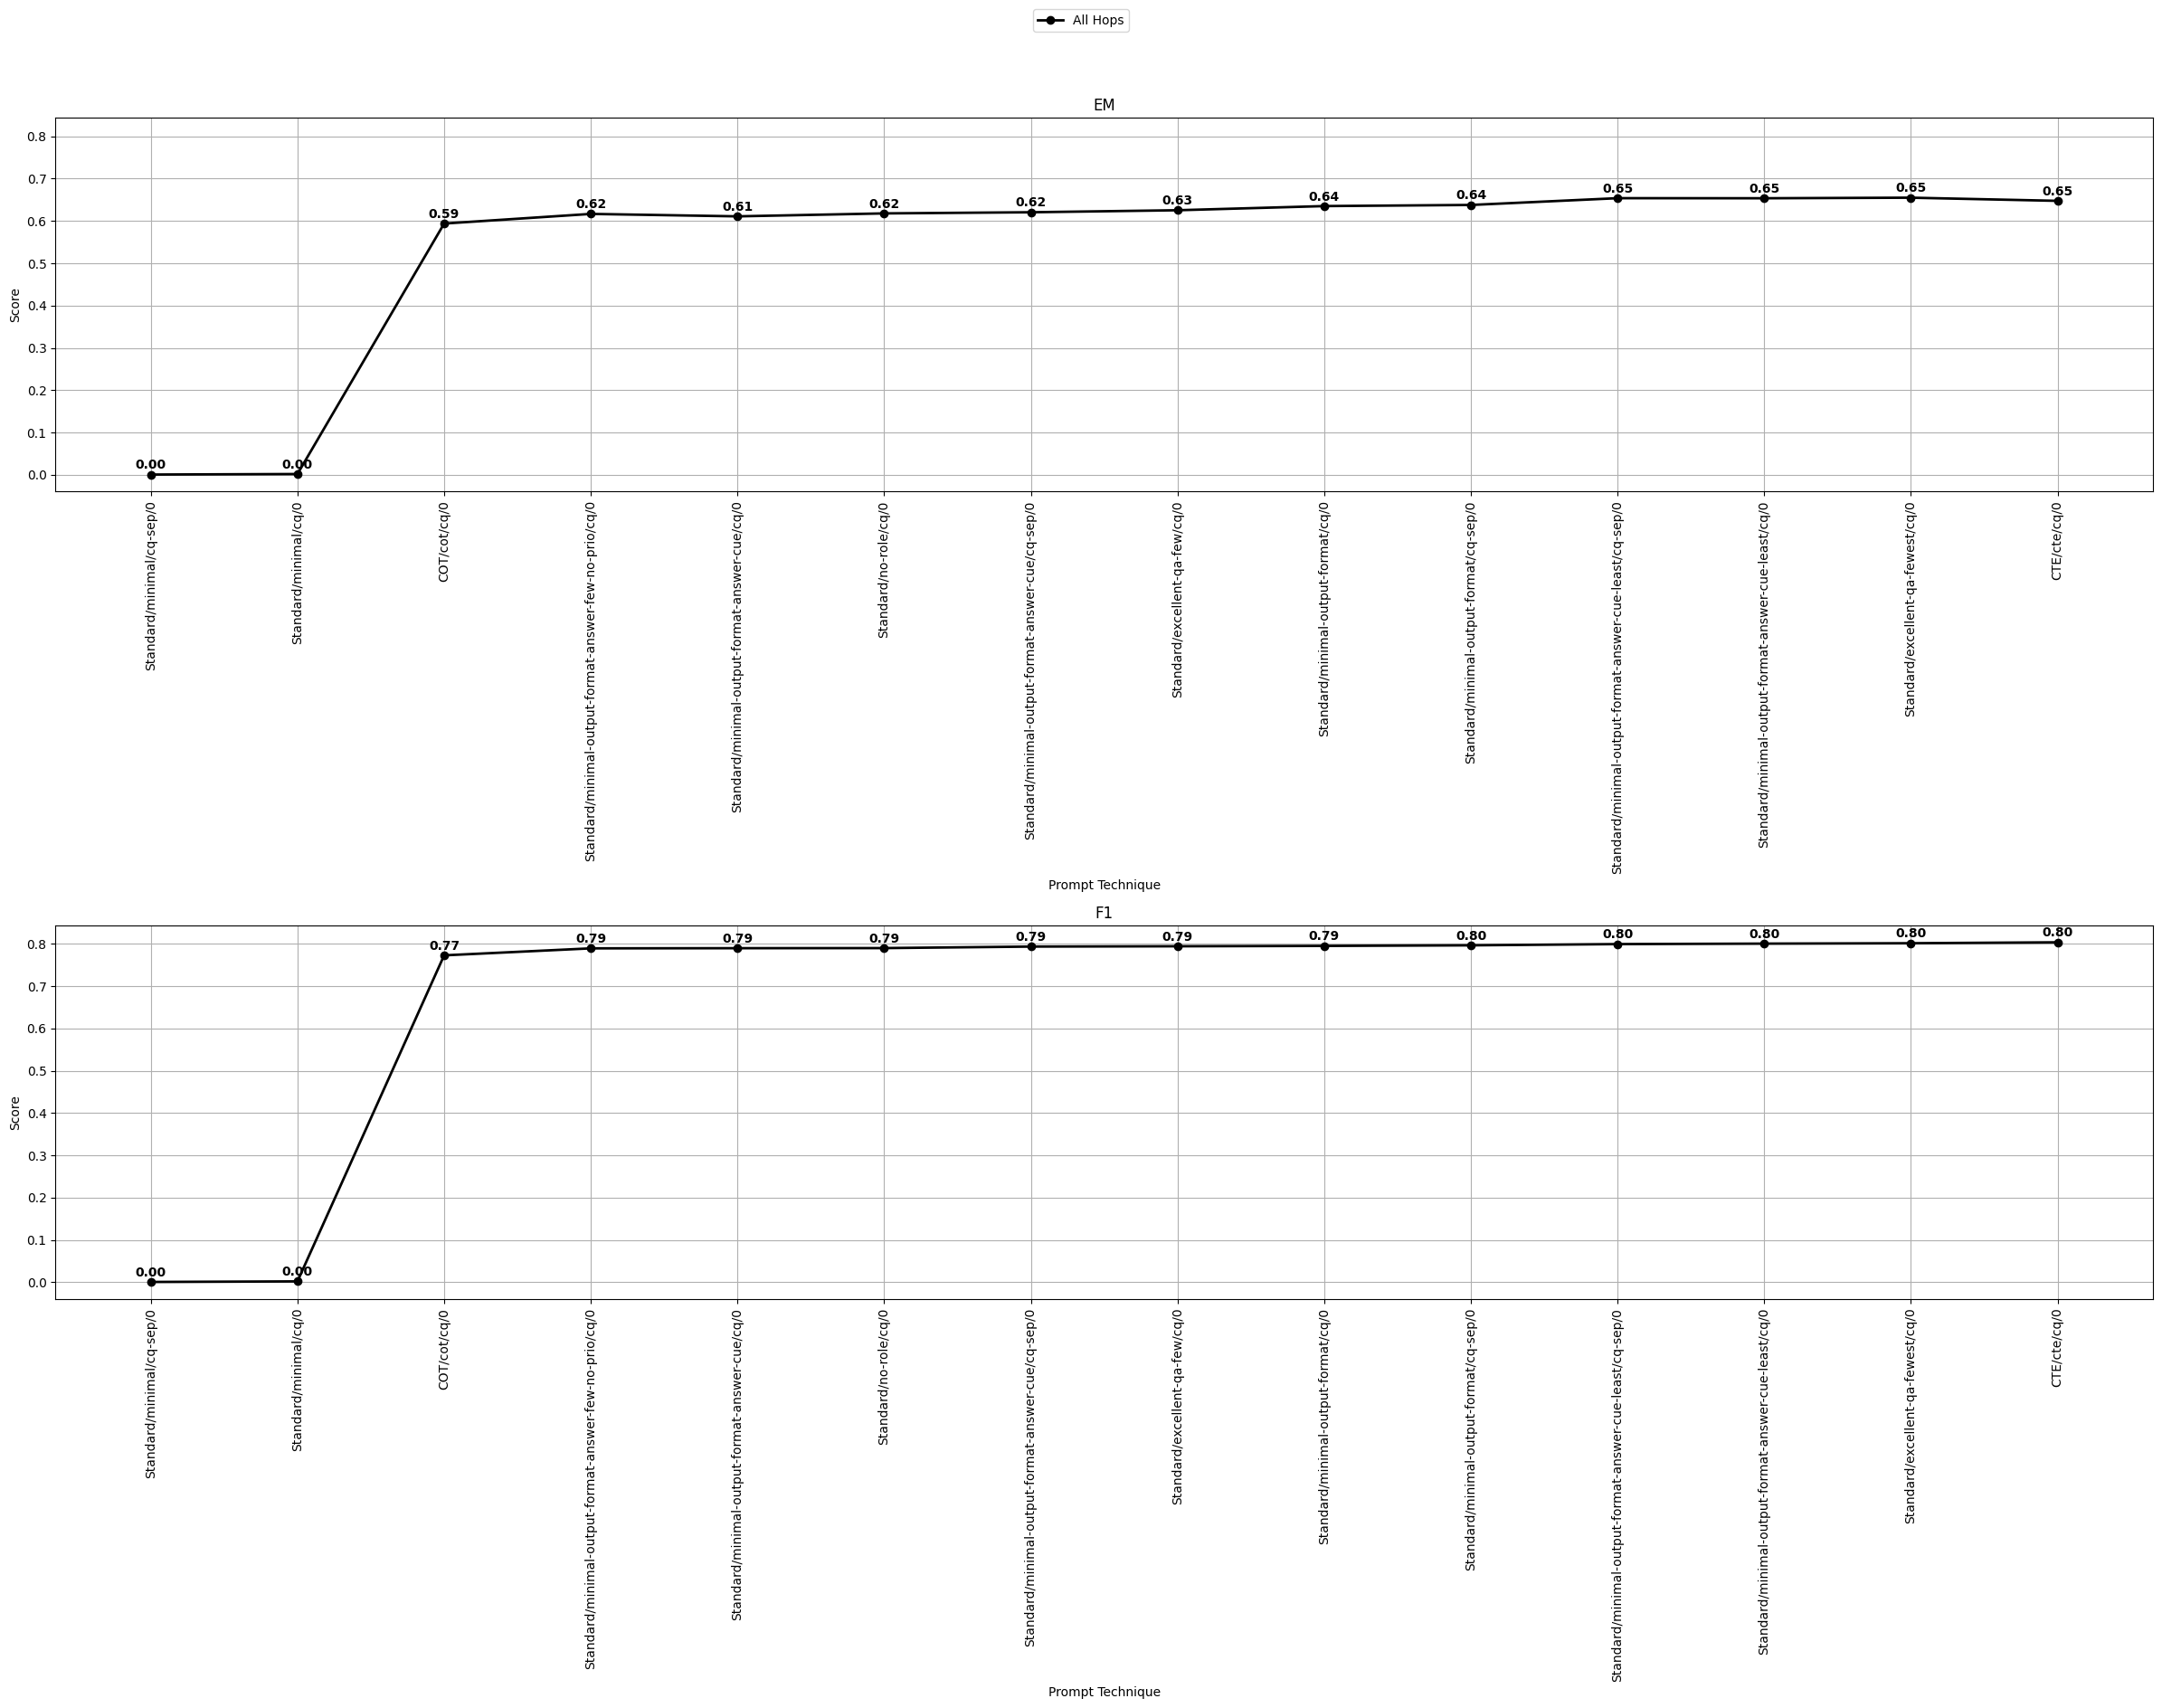

In [17]:
mask = df_target['params.qa.n_shot'] == 0
plot_dataframe(df_target.loc[mask])
df_target.loc[mask].sort_values('metrics.f1', ascending=False).drop(columns=['params.qa.n_shot'])

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
7,Standard,excellent-qa-few,cq.txt,2,0.658024,0.808459,0.707315,0.658024,0.808459,0.707315
9,Standard,excellent-qa-fewest,cq.txt,2,0.663831,0.807695,0.706550,0.663831,0.807695,0.706550
8,Standard,excellent-qa-fewest,cq.txt,0,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
17,Standard,minimal-output-format-answer-cue-least,cq.txt,0,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
16,Standard,minimal-output-format-answer-cue-least,cq-sep.txt,0,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,Standard,minimal-output-format,cq-sep.txt,0,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,Standard,minimal-output-format,cq.txt,0,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200
6,Standard,excellent-qa-few,cq.txt,0,0.625298,0.793988,0.699437,0.625298,0.793988,0.699437
14,Standard,minimal-output-format-answer-cue,cq-sep.txt,0,0.620527,0.793233,0.699392,0.620527,0.793233,0.699392
19,Standard,no-role,cq.txt,0,0.617826,0.789648,0.696016,0.617826,0.789648,0.696016


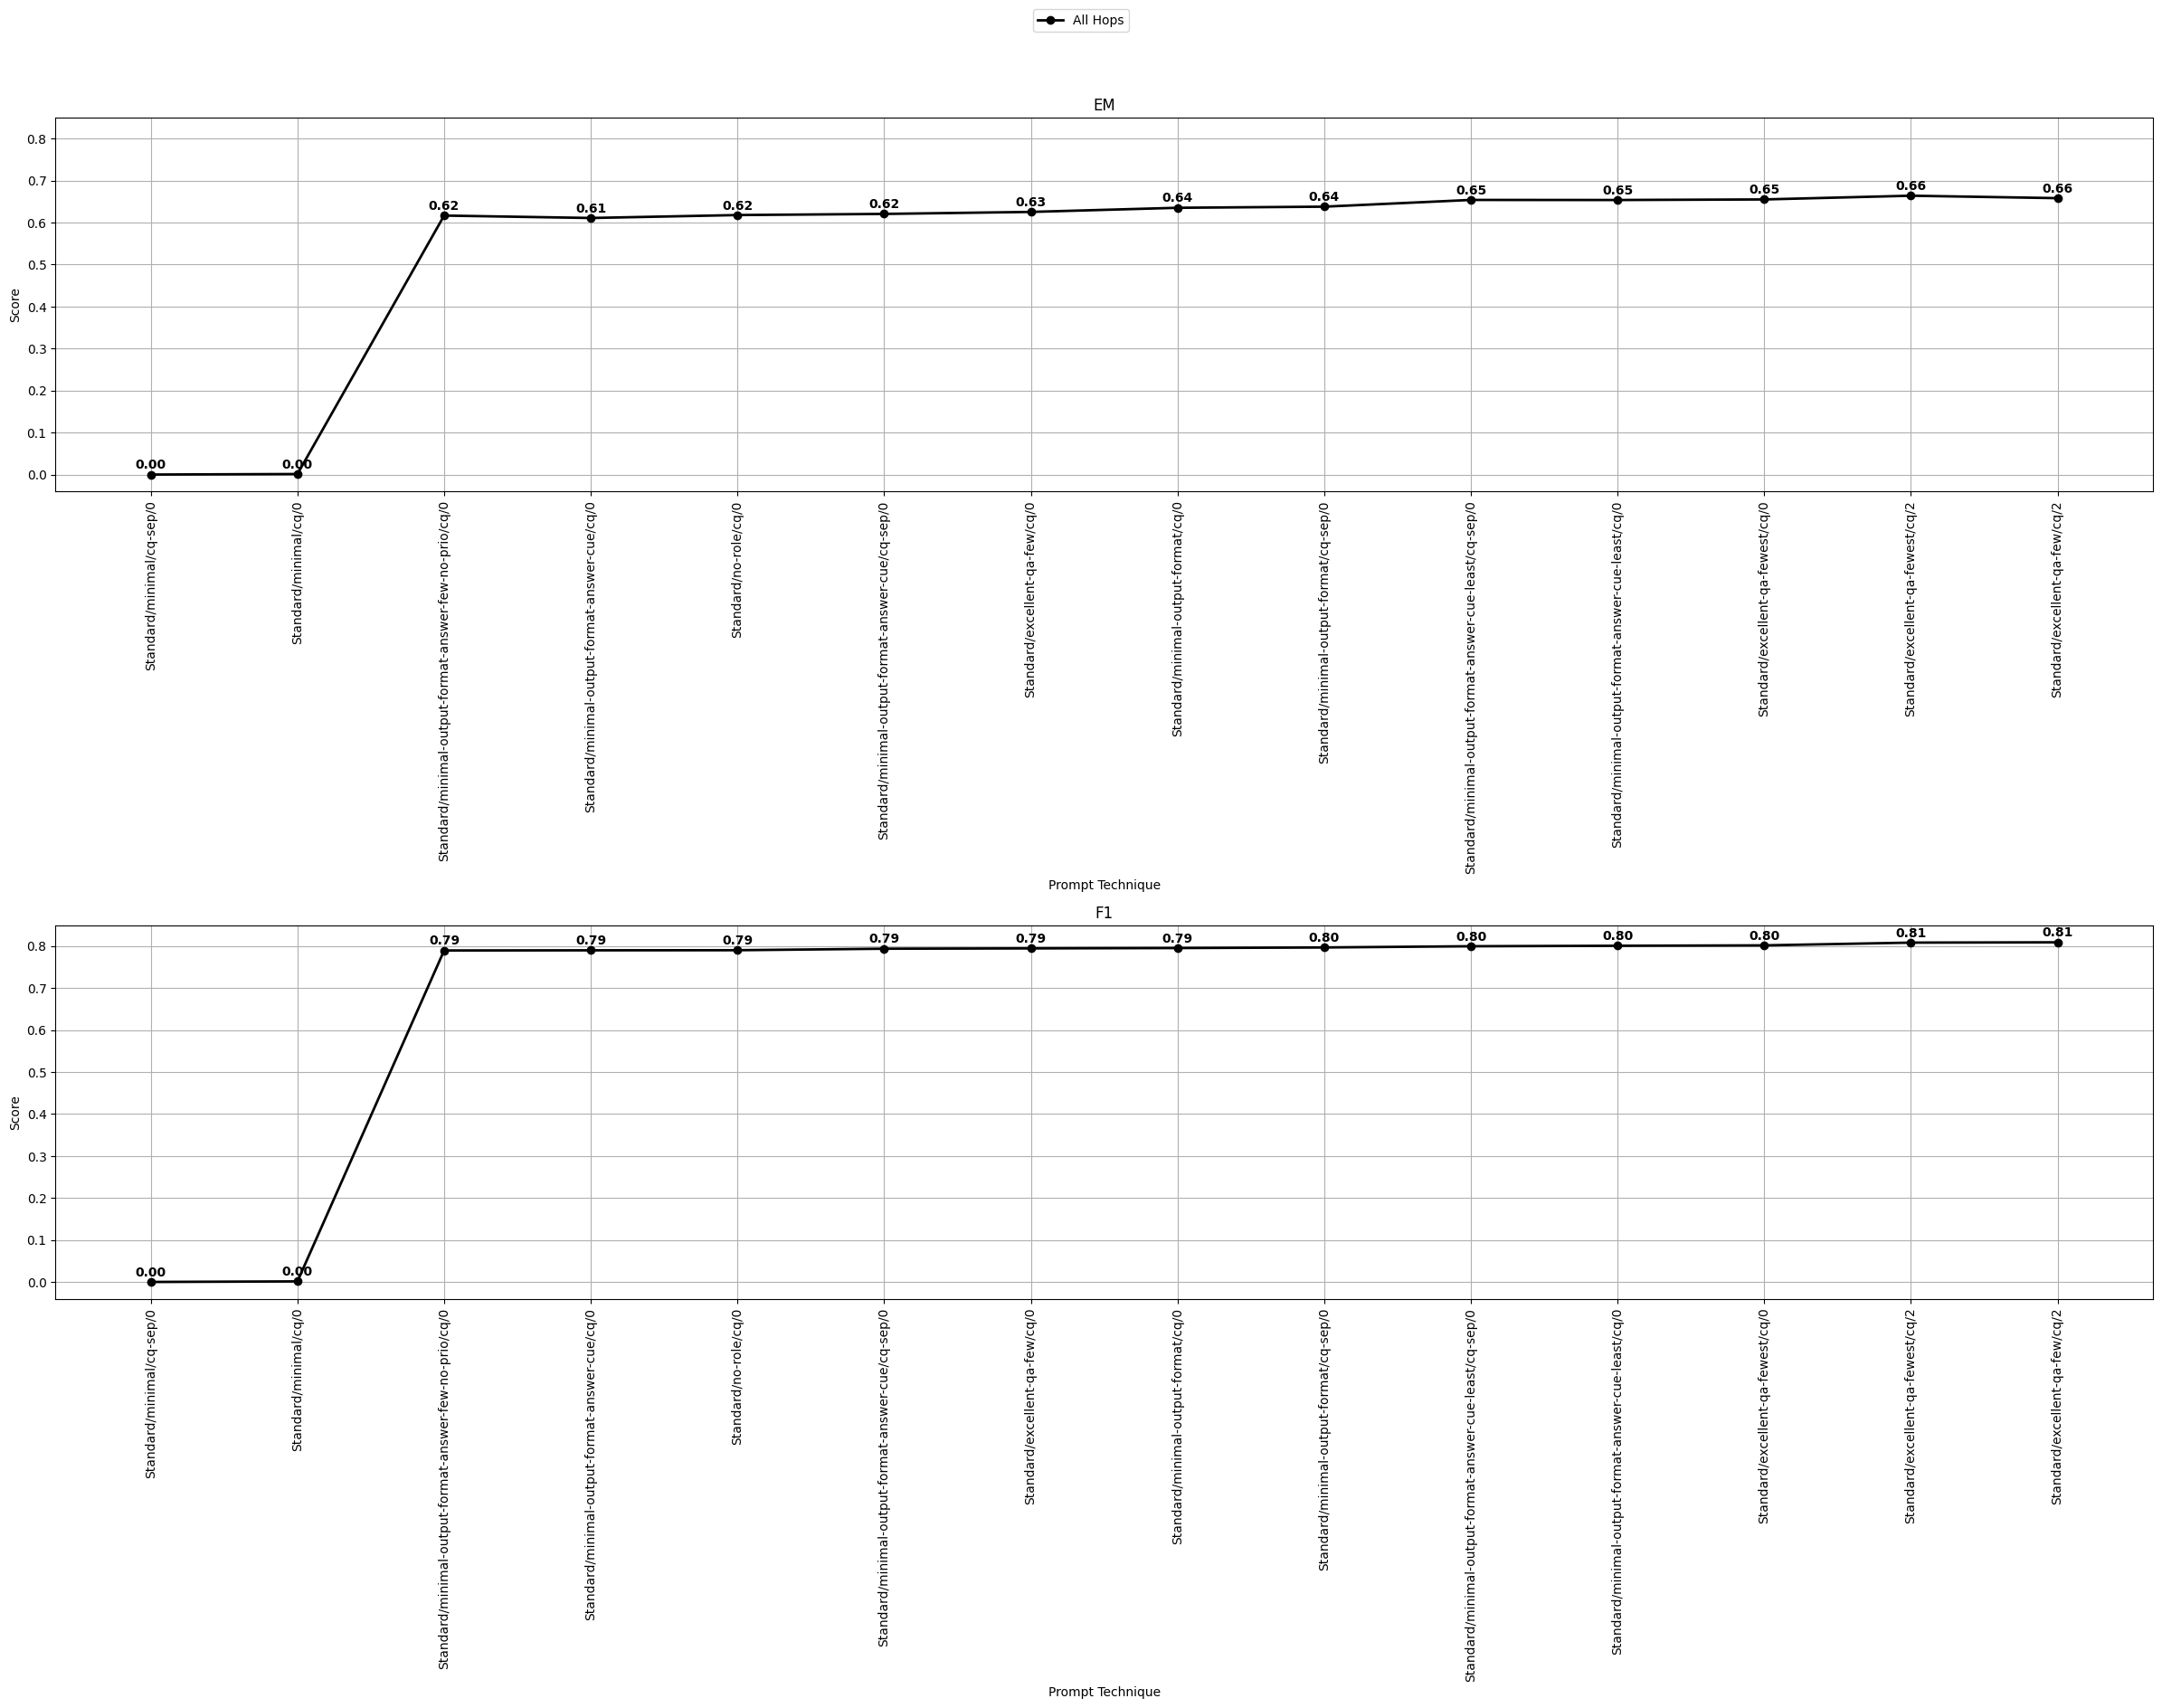

In [18]:
mask = df_target['params.qa.technique'] == 'Standard'
plot_dataframe(df_target.loc[mask])
df_target.loc[mask].sort_values('metrics.f1', ascending=False)

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
5,CTE,excellent-qa-cte,cq.txt,2,0.667252,0.813845,0.714742,0.667252,0.813845,0.714742
4,CTE,cte,cq.txt,2,0.660140,0.813166,0.712402,0.660140,0.813166,0.712402
3,CTE,cte,cq.txt,0,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743


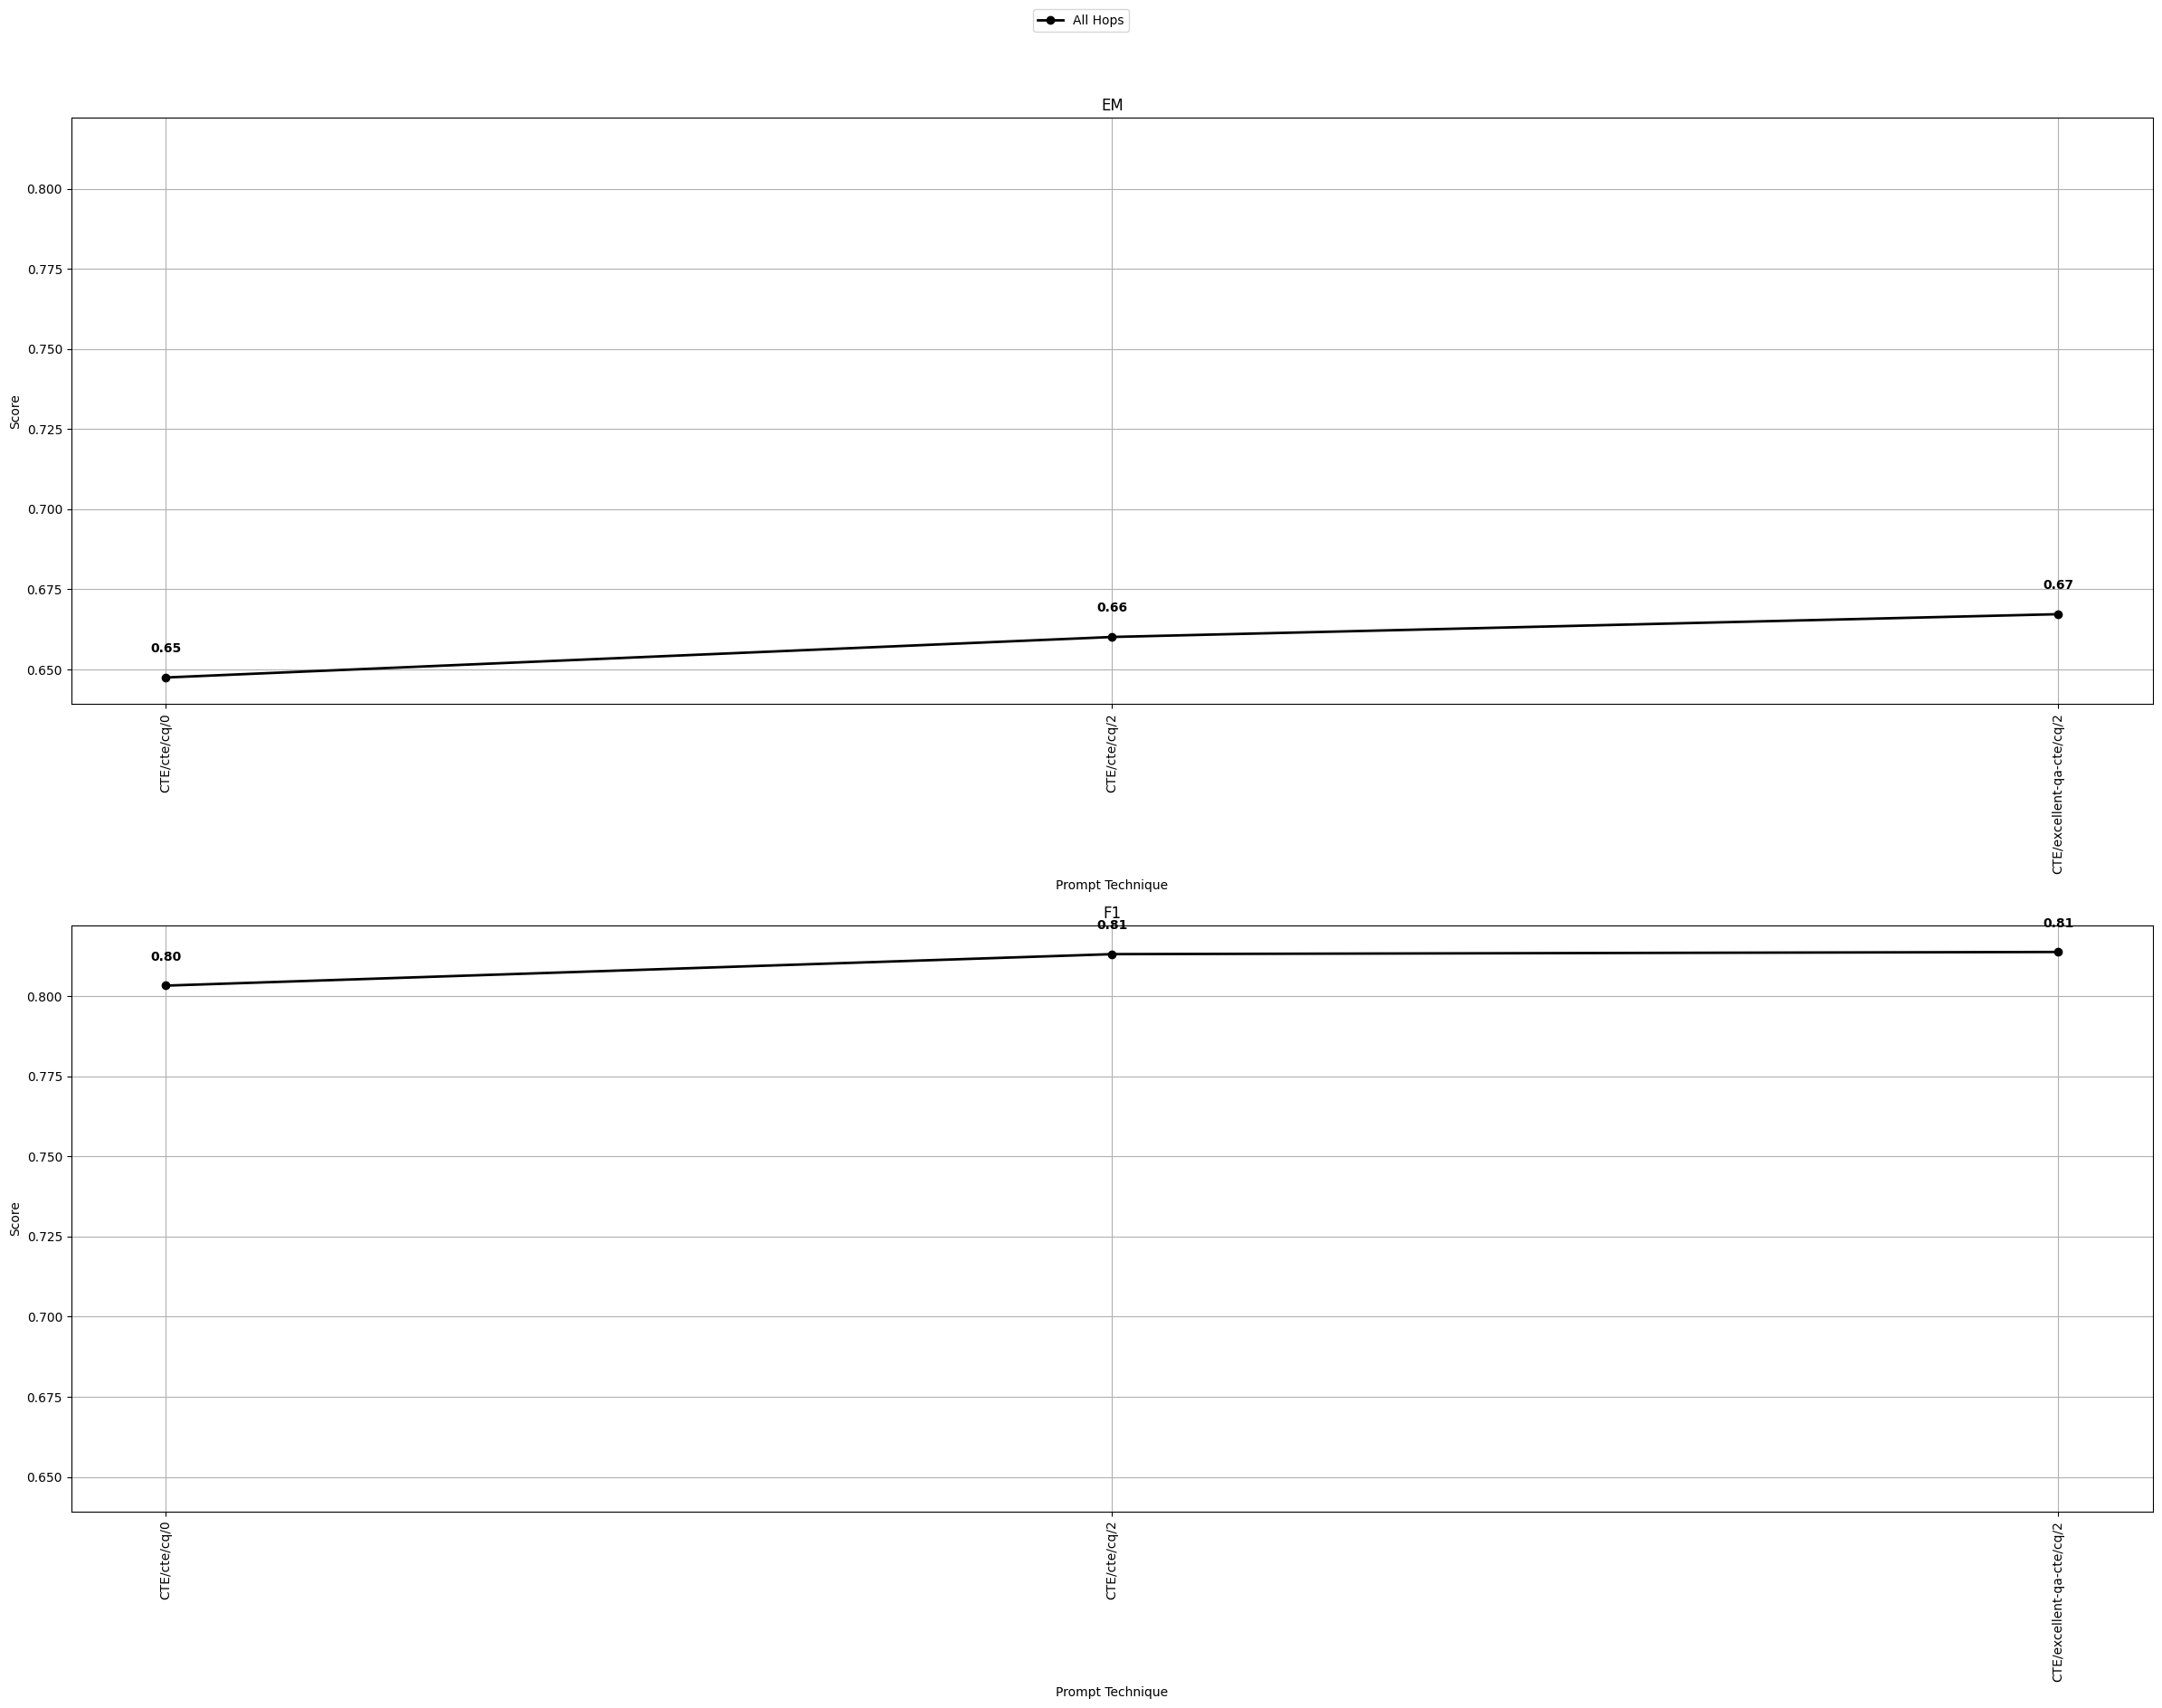

In [19]:
mask = df_target['params.qa.technique'] == 'CTE'
plot_dataframe(df_target.loc[mask])
df_target.loc[mask].sort_values('metrics.f1', ascending=False)

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.n_shot,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
1,COT,cot,cq.txt,2,0.632681,0.783430,0.683142,0.632681,0.783430,0.683142
0,COT,cot,cq.txt,0,0.593833,0.772517,0.685978,0.593833,0.772517,0.685978
2,COT,excellent-qa-cot,cq.txt,2,0.614225,0.752383,0.656808,0.614225,0.752383,0.656808


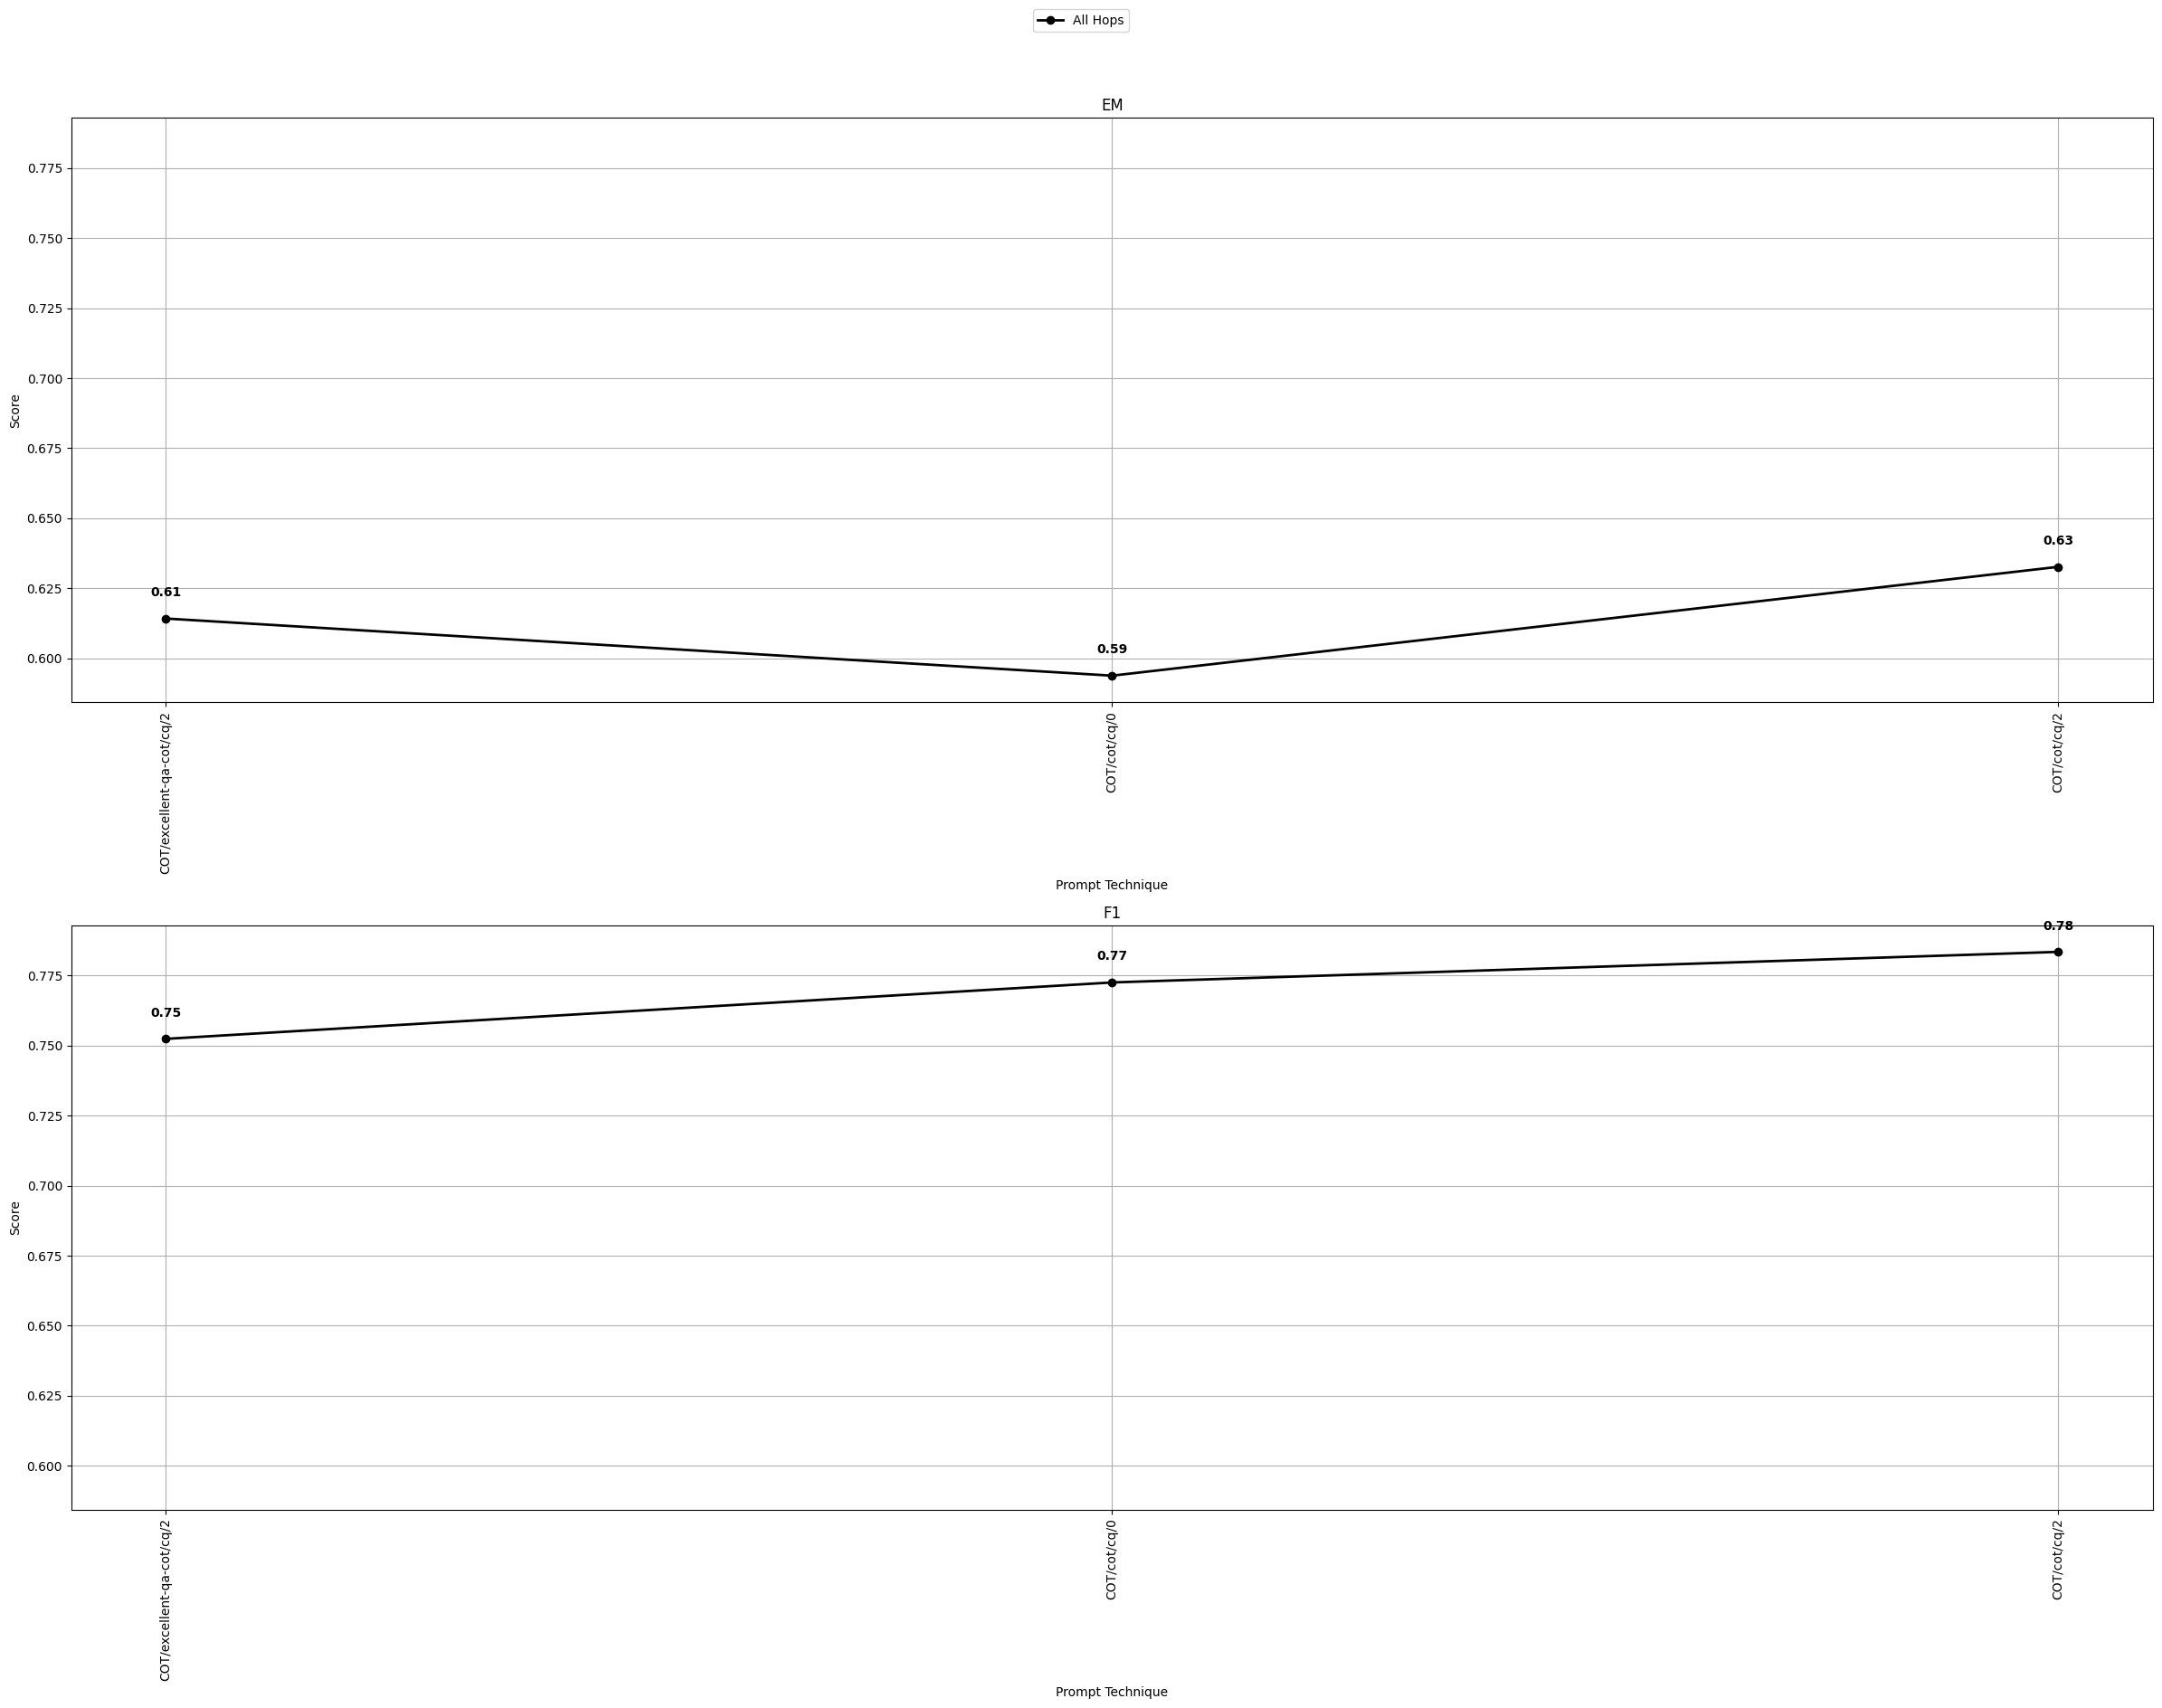

In [20]:
mask = df_target['params.qa.technique'] == 'COT'
plot_dataframe(df_target.loc[mask])
df_target.loc[mask].sort_values('metrics.f1', ascending=False)